## LSTM 신경망 훈련하기.

In [20]:
#IMDB data 불러오기, train,val set 나누기.
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [21]:
#keras의 pad_sequences()함수로 각 샘플의 길이를 100으로 맞춰주고, 짧으면 패딩을 추가, 길면 삭제한다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [23]:
#LSTM을 사용한 순환층 만들기.
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length = 100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [25]:
#모델 컴파일, train
#배치크기는 64개, epoch횟수는100회
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data = (val_seq, val_target),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 19ms/step - loss: 0.6926 - accuracy: 0.5218 - val_loss: 0.6908 - val_accuracy: 0.5990
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6899 - accuracy: 0.6131 - val_loss: 0.6856 - val_accuracy: 0.6460
Epoch 3/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6822 - accuracy: 0.6544 - val_loss: 0.6656 - val_accuracy: 0.6766
Epoch 4/100
313/313 [==============================] - 8s 26ms/step - loss: 0.6509 - accuracy: 0.6920 - val_loss: 0.6066 - val_accuracy: 0.7362
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5977 - accuracy: 0.7351 - val_loss: 0.5791 - val_accuracy: 0.7430
Epoch 6/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5726 - accuracy: 0.7489 - val_loss: 0.5614 - val_accuracy: 0.7512
Epoch 7/100
313/313 [==============================] - 9s 27ms/step - loss: 0.5546 - accuracy: 0.7543 - val_loss: 0.5482 - val_accuracy:

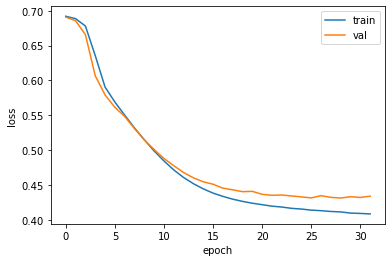

In [27]:
#손실그래프 그리기.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [28]:
#순환층에 Dropout 적용하기.(과대적합 막기)
#순환층은 자체적으로 dropout기능을 제공한다.(dropout클래스를 사용하지 않아도 됨)
#dropout 매개변수는 셀의 입력에 dropout을 적용하고, recurrent_dropout은 순환되는 은닉상태에 dropout을 적용한다.
#recurrent_dropout은 GPU를 사용하지 못한다.

#30%의 dropout을 적용하기.
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length = 100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [29]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data = (val_seq, val_target),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 25ms/step - loss: 0.6924 - accuracy: 0.5224 - val_loss: 0.6894 - val_accuracy: 0.5970
Epoch 2/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6876 - accuracy: 0.6065 - val_loss: 0.6806 - val_accuracy: 0.6456
Epoch 3/100
313/313 [==============================] - 9s 27ms/step - loss: 0.6745 - accuracy: 0.6600 - val_loss: 0.6438 - val_accuracy: 0.7048
Epoch 4/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6171 - accuracy: 0.7091 - val_loss: 0.5741 - val_accuracy: 0.7158
Epoch 5/100
313/313 [==============================] - 12s 39ms/step - loss: 0.5673 - accuracy: 0.7225 - val_loss: 0.5514 - val_accuracy: 0.7416
Epoch 6/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5447 - accuracy: 0.7495 - val_loss: 0.5355 - val_accuracy: 0.7492
Epoch 7/100
313/313 [==============================] - 12s 38ms/step - loss: 0.5289 - accuracy: 0.7590 - val_loss: 0.5262 - val_accurac

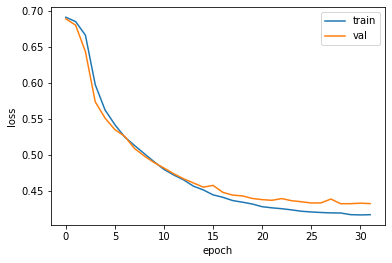

In [30]:
#손실그래프 그리기.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### 2개의 순환층 연결하기.
- 한개의 순환층만 사용할때는 출력이 마지막 타임스텝의 은닉상태를 출력한다.하지만
- 하지만 두개의 순환층을 연결해 사용할 때에는 처음 순환층은 모든 타임스텝의 은닉상태를 출력하고,   
- 두번째 순환층은 마지막 타임스텝의 은닉상태를 출력한다.
- 모든 타임스텝의 은닉상태를 출력하기 위해서는 return_sequences 매개변수를 Trie로 지정해 주어야 한다.

In [32]:
#2개의 순환층 연결.
#return_sequences=True 로 지정하여 순환층의 출력을 모든 타임스텝의 은닉상태를 출력하게 한다.
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length = 100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [35]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [34]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data = (val_seq, val_target),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 47ms/step - loss: 0.6927 - accuracy: 0.5241 - val_loss: 0.6910 - val_accuracy: 0.6098
Epoch 2/100
313/313 [==============================] - 18s 57ms/step - loss: 0.6899 - accuracy: 0.5977 - val_loss: 0.6836 - val_accuracy: 0.6060
Epoch 3/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6755 - accuracy: 0.6266 - val_loss: 0.6376 - val_accuracy: 0.6550
Epoch 4/100
313/313 [==============================] - 16s 52ms/step - loss: 0.6183 - accuracy: 0.6897 - val_loss: 0.5777 - val_accuracy: 0.7276
Epoch 5/100
313/313 [==============================] - 21s 67ms/step - loss: 0.5755 - accuracy: 0.7196 - val_loss: 0.5514 - val_accuracy: 0.7388
Epoch 6/100
313/313 [==============================] - 27s 87ms/step - loss: 0.5436 - accuracy: 0.7439 - val_loss: 0.5302 - val_accuracy: 0.7522
Epoch 7/100
313/313 [==============================] - 28s 90ms/step - loss: 0.5240 - accuracy: 0.7544 - val_loss: 0.5143 - val_ac

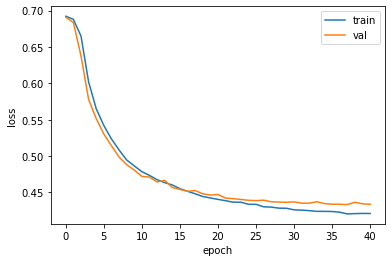

In [36]:
#손실그래프 그리기.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## GRU셀을 사용한 순환신경망

In [38]:
#GRU 신경망 훈련하기.model3 = keras.Sequential()
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length = 100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [39]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [40]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data = (val_seq, val_target),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 29ms/step - loss: 0.6927 - accuracy: 0.5241 - val_loss: 0.6915 - val_accuracy: 0.5398
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6908 - accuracy: 0.5645 - val_loss: 0.6889 - val_accuracy: 0.5642
Epoch 3/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6872 - accuracy: 0.5907 - val_loss: 0.6839 - val_accuracy: 0.6012
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6820 - accuracy: 0.6074 - val_loss: 0.6751 - val_accuracy: 0.6182
Epoch 5/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6702 - accuracy: 0.6334 - val_loss: 0.6593 - val_accuracy: 0.6440
Epoch 6/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6507 - accuracy: 0.6467 - val_loss: 0.6231 - val_accuracy: 0.6762
Epoch 7/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6007 - accuracy: 0.6907 - val_loss: 0.5602 - val_accuracy

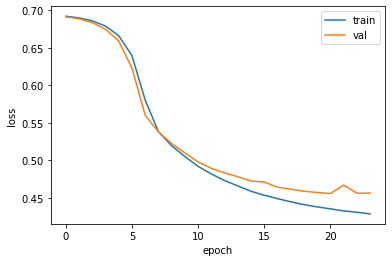

In [41]:
#손실그래프 그리기.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()